<a href="https://colab.research.google.com/github/srbee/python/blob/master/mannMorrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mann and Morrison Algorithm

42


Text(0, 0.5, 'v(n),Vp_estimate,Vp_true')

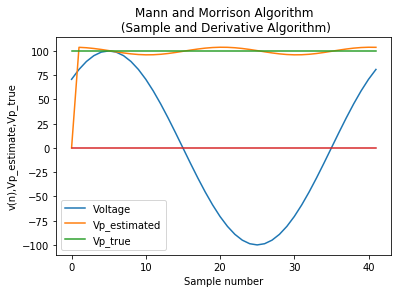

In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt 

pi=np.pi
e=math.exp(1)
#print(pi,e)
fsig=50
nyquist=40   # sampling factor 
fsamp=nyquist*fsig
dt=1/fsamp #  sampling at twice signal frequency
w=2*pi*fsig
start=0
stop=21e-3
#dt=1e-3
step=dt
t=np.arange(start,stop,step)


wt=w*t
phi=pi/4
#print(wt)
Vp=100
v=Vp*np.sin(wt+phi)    # v      : voltage samples
vd=np.zeros_like(v)    # v_dash:first derivative of voltage samples
vdByw=np.zeros_like(v) # v_dash/w
vmag_err_pc=np.zeros_like(v)
Vp_est  = np.zeros_like(v)
base=np.zeros_like(v)
Vp_true = Vp*np.ones_like(v)
N=len(v)
print(N)
plt.plot(v,label='Voltage')
for i in range(1,N):
    #print(i)
    vd[i]     = (v[i]-v[i-1])/dt
    vdByw[i]  = vd[i]/w
    Vp_est[i] = np.sqrt(v[i]**2+vdByw[i]**2)
    vmag_err_pc[i]=((Vp_est[i]-Vp)/(Vp))*100
plt.plot(Vp_est,label='Vp_estimated')
plt.plot(Vp_true,label='Vp_true')
plt.plot(base)
plt.legend()
plt.title('Mann and Morrison Algorithm\n (Sample and Derivative Algorithm)')
plt.xlabel('Sample number')
plt.ylabel('v(n),Vp_estimate,Vp_true')
#print(vmag_err_pc)    
#print(w)